In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

In [109]:

class App_Logger:
    def __init__(self):
        pass

    def log(self, file_object, log_message):#This method will be used for logging all the information to the file.
        self.now = datetime.now()
        self.date = self.now.date()
        self.current_time = self.now.strftime("%H:%M:%S")
        file_object.write(str(self.date) + "/" + str(self.current_time) + "\t\t" + log_message +"\n")

In [110]:
class DataVisualization:
    """
    This class shall be used to include all Data Visualization techniques to be feed to the Machine Learning Models

    Written By: Shakti Kumar
    Version: 1.0
    Revisions: None

    """
    def __init__(self,file_object,logger_object):
        self.file_object = file_object
        self.logger_object = logger_object
        
    
    def balance_imbalance_check(self,dataframe,target):
        
        """
        Method Name: balance_imbalance_check
        Description: This method will be used to plot the balance/imbalance datasets using barplot/countplot 

        Input Description: data: the input dataframe with target column.
                           target: target column name.

        Output: plot of target variable value count.
        On Failure: Raise Exception

        Written By: shakti kumar
        Version: 1.0
        Revisions: None

        """
        
        try:
            #x = sns.countplot(target,data=dataframe).set_title("Balance Imbalance Count")
            #sns.barplot(x = 'is_promoted', y = 'is_promoted' ,data=df, hue  = 'is_promoted', estimator = lambda x: len(x)/len(df) *100).set_title("Balance Imbalance Count")
            sns.barplot(x = 'is_promoted', y = 'is_promoted' ,data=df, estimator = lambda x: len(x)/len(df) *100)
            plt.xlabel('ispromoted')
            plt.ylabel('percentage')
            plt.title('Balance Imbalance Count')
        except Exception as e:
            self.logger_object.log(self.file_object,'Exception occured in checking balance and imbalance of the target(Graphically). Exception message: '+str(e)) # Logging the exception message
            self.logger_object.log(self.file_object,
                                   'Target Value balance and imbalance check fail.Exited the balance_imbalance_check method of the DataVisualization class') # Logging unsuccessful load of data
            raise Exception() # raising exception and exiting
    
    
    def corelation_heatmap(self,dataframe):
        
        """
        Method Name: corelation_heatmap
        Description: This method will be used to plot the heatmap to show the corelation among the variables 
                     
        Input Description: data: the input dataframe with target column.

        Output: plot of heatmap that shows the corelation among the variable.
        On Failure: Raise Exception

        Written By: shakti kumar
        Version: 1.0
        Revisions: None

        """
        try:
            data = dataframe
            le = LabelEncoder()
            for i in data.columns:
                if data[i].dtype == 'O':
                    data[i] = le.fit_transform(df[i])
            plt.figure(figsize=(20,10))
            sns.heatmap(data.corr(),annot = True,cmap = 'RdYlGn')
        except Exception as e:
            self.logger_object.log(self.file_object,'Exception occured in plotting correlation heatmap. Exception message: '+str(e)) # Logging the exception message
            self.logger_object.log(self.file_object,
                                   'Plotting of heatmap fails.Exited the correlation_heatmap method of the DataVisualization class') # Logging unsuccessful load of data
            raise Exception() # raising exception and exiting
            

In [111]:
df = pd.read_csv('train.csv')

In [112]:
df.shape

(54808, 14)

In [113]:
df.dropna(inplace = True)

In [114]:
df.shape

(48660, 14)

In [115]:
logger_object = App_Logger()

In [116]:
f = open("LogFile.txt","a+")

In [117]:
vis = DataVisualization(f,logger_object)

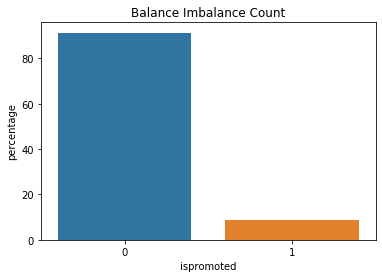

In [118]:
vis.balance_imbalance_check(df,'is_promoted')

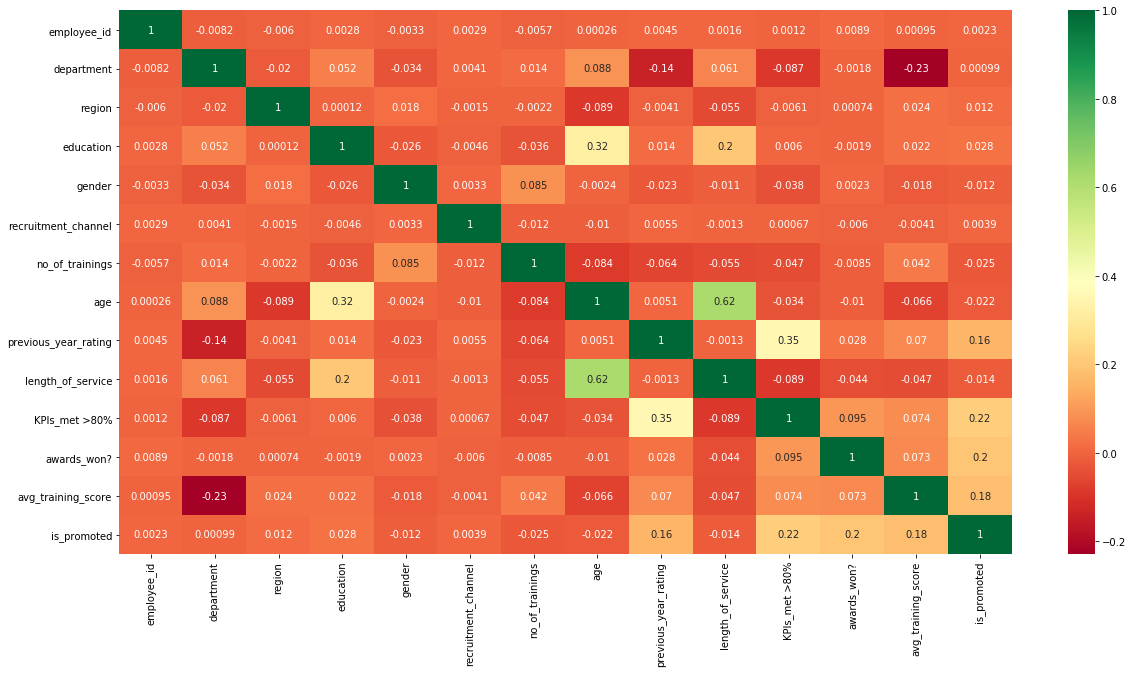

In [119]:
vis.corelation_heatmap(df)